# COVID-19 Vaccination Data Analysis

This project is about "**COVID-19 World Vaccination Progress**" Data Analysis with Python. Collected this Dataset from "Kaggle" which is the world's largest data science community with powerful tools and resources.

![COVID-19 Vaccination image](https://assetsds.cdnedge.bluemix.net/sites/default/files/styles/very_big_1/public/feature/images/2021/01/11/covid-vaccine.jpg?itok=xMzn_yrM)

This dataset contains 35310 rows and 15 columns which is really informaive to analysis. In this project,an attempt has been made to analyze various information of COVID-19 World Vaccination Progress such as country, total_Vaccinations, people_vaccinated,	daily_vaccinations total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred,	 vaccines and many more.

Library Used:

* pandas
* matplotlib
* seaborn

## Data Preparation and Cleaning




> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data

In [1]:
import pandas as pd

In [2]:
vaccinations_df = pd.read_csv('data/country_vaccinations.csv')

In [3]:
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56636,Zimbabwe,ZWE,2021-11-05,5990358.0,3356421.0,2633937.0,14598.0,14097.0,39.69,22.24,17.45,934.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
56637,Zimbabwe,ZWE,2021-11-06,6007025.0,3364633.0,2642392.0,16667.0,14805.0,39.80,22.29,17.51,981.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
56638,Zimbabwe,ZWE,2021-11-07,6021461.0,3372721.0,2648740.0,14436.0,15696.0,39.90,22.35,17.55,1040.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
56639,Zimbabwe,ZWE,2021-11-08,6034324.0,3380245.0,2654079.0,12863.0,15858.0,39.98,22.40,17.59,1051.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56641 entries, 0 to 56640
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              56641 non-null  object 
 1   iso_code                             56641 non-null  object 
 2   date                                 56641 non-null  object 
 3   total_vaccinations                   30558 non-null  float64
 4   people_vaccinated                    29021 non-null  float64
 5   people_fully_vaccinated              26188 non-null  float64
 6   daily_vaccinations_raw               25032 non-null  float64
 7   daily_vaccinations                   56390 non-null  float64
 8   total_vaccinations_per_hundred       30558 non-null  float64
 9   people_vaccinated_per_hundred        29021 non-null  float64
 10  people_fully_vaccinated_per_hundred  26188 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
vaccinations_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [6]:
vaccinations_df.shape

(56641, 15)

In [7]:
vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.055800e+04,2.902100e+04,2.618800e+04,2.503200e+04,5.639000e+04,30558.000000,29021.000000,26188.000000,56390.000000
mean,2.680936e+07,1.117047e+07,7.582739e+06,2.561311e+05,1.304358e+05,53.745225,31.290404,24.644339,3487.383845
std,1.456621e+08,4.463657e+07,2.831494e+07,1.247050e+06,8.223533e+05,51.053599,26.481869,24.271303,4218.846758
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.978305e+05,2.248030e+05,1.196940e+05,4.963750e+03,9.550000e+02,7.522500,5.870000,3.077500,607.000000
50%,2.000474e+06,1.282196e+06,8.849215e+05,2.476650e+04,7.088500e+03,37.390000,25.680000,15.775000,2232.000000
75%,9.984869e+06,5.670769e+06,4.503751e+06,1.176888e+05,4.196275e+04,92.907500,55.080000,43.472500,5097.750000
max,2.346831e+09,1.155058e+09,1.072454e+09,2.474100e+07,2.242429e+07,272.870000,120.440000,118.170000,117497.000000


In [8]:
vaccinations_df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     26083
people_vaccinated                      27620
people_fully_vaccinated                30453
daily_vaccinations_raw                 31609
daily_vaccinations                       251
total_vaccinations_per_hundred         26083
people_vaccinated_per_hundred          27620
people_fully_vaccinated_per_hundred    30453
daily_vaccinations_per_million           251
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [9]:
vaccinations_df.fillna(value=0, inplace=True)
date = vaccinations_df.date.str.split('-', expand=True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
56636,2021,11,05
56637,2021,11,06
56638,2021,11,07
56639,2021,11,08


In [10]:
vaccinations_df['year'] = date[0]
vaccinations_df['month'] = date[1]
vaccinations_df['day'] = date[2]

vaccinations_df.year = pd.to_numeric(vaccinations_df.year)
vaccinations_df.month = pd.to_numeric(vaccinations_df.month)
vaccinations_df.day = pd.to_numeric(vaccinations_df.day)

vaccinations_df.date = pd.to_datetime(vaccinations_df.date)

vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [11]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56641 entries, 0 to 56640
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              56641 non-null  object        
 1   iso_code                             56641 non-null  object        
 2   date                                 56641 non-null  datetime64[ns]
 3   total_vaccinations                   56641 non-null  float64       
 4   people_vaccinated                    56641 non-null  float64       
 5   people_fully_vaccinated              56641 non-null  float64       
 6   daily_vaccinations_raw               56641 non-null  float64       
 7   daily_vaccinations                   56641 non-null  float64       
 8   total_vaccinations_per_hundred       56641 non-null  float64       
 9   people_vaccinated_per_hundred        56641 non-null  float64       
 10  people_ful

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Explore the mean, min, max

In [13]:
vaccinations_df.mean()

<ipython-input-13-d101732c3b1b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  vaccinations_df.mean()


total_vaccinations                     1.446373e+07
people_vaccinated                      5.723386e+06
people_fully_vaccinated                3.505884e+06
daily_vaccinations_raw                 1.131949e+05
daily_vaccinations                     1.298578e+05
total_vaccinations_per_hundred         2.899572e+01
people_vaccinated_per_hundred          1.603218e+01
people_fully_vaccinated_per_hundred    1.139432e+01
daily_vaccinations_per_million         3.471930e+03
year                                   2.020994e+03
month                                  6.330679e+00
day                                    1.574232e+01
dtype: float64

In [43]:
vaccinations_df.min()

country                                                                      Afghanistan
iso_code                                                                             ABW
date                                                                 2020-12-01 00:00:00
total_vaccinations                                                                   0.0
people_vaccinated                                                                    0.0
people_fully_vaccinated                                                              0.0
daily_vaccinations_raw                                                               0.0
daily_vaccinations                                                                   0.0
total_vaccinations_per_hundred                                                       0.0
people_vaccinated_per_hundred                                                        0.0
people_fully_vaccinated_per_hundred                                                  0.0
daily_vaccinations_pe

In [44]:
vaccinations_df.max()

country                                                              Zimbabwe
iso_code                                                                  ZWE
date                                                      2021-11-09 00:00:00
total_vaccinations                                               2346831000.0
people_vaccinated                                                1155058478.0
people_fully_vaccinated                                          1072454000.0
daily_vaccinations_raw                                             24741000.0
daily_vaccinations                                                 22424286.0
total_vaccinations_per_hundred                                         272.87
people_vaccinated_per_hundred                                          120.44
people_fully_vaccinated_per_hundred                                    118.17
daily_vaccinations_per_million                                       117497.0
vaccines                                                        

Explore the country Coloum

In [16]:
vaccinations_df.country.value_counts()

Denmark             343
Norway              342
Latvia              341
United States       332
Canada              331
                   ... 
Pitcairn             85
Tanzania             83
Falkland Islands     67
Niue                 43
Burundi              18
Name: country, Length: 223, dtype: int64

In [17]:
vaccinations_df.country

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
56636       Zimbabwe
56637       Zimbabwe
56638       Zimbabwe
56639       Zimbabwe
56640       Zimbabwe
Name: country, Length: 56641, dtype: object

In [18]:
vaccinations_df.country.nunique()

223

Explore the min and max of fully vacnated people. 

In [19]:
vaccinations_df.people_fully_vaccinated.min()

0.0

In [20]:
vaccinations_df.people_fully_vaccinated.max()

1072454000.0

Explore the min and max date.

In [21]:
vaccinations_df.date.min()

Timestamp('2020-12-01 00:00:00')

In [22]:
vaccinations_df.date.max()

Timestamp('2021-11-09 00:00:00')

Explore The Number of daily vaccinations dynamic

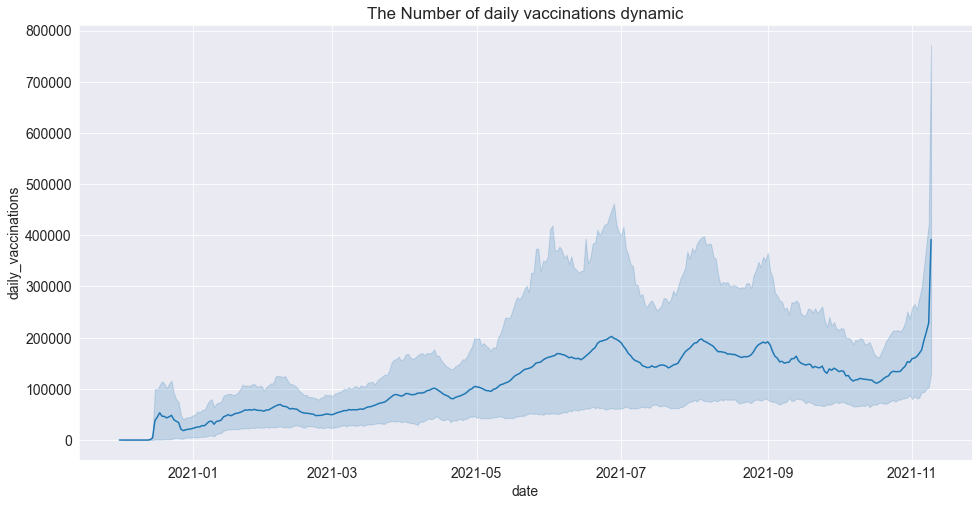

In [23]:
plt.figure(figsize=(16,8))
sns.lineplot(x=vaccinations_df.date, y=vaccinations_df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

Explore the Vaccination procedure go on rapidly from which date.

In [24]:
countries = vaccinations_df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= vaccinations_df.columns)
for country in countries:
    top_countries = top_countries.append(vaccinations_df.loc[vaccinations_df['country'] == country])

C:\Users\augus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


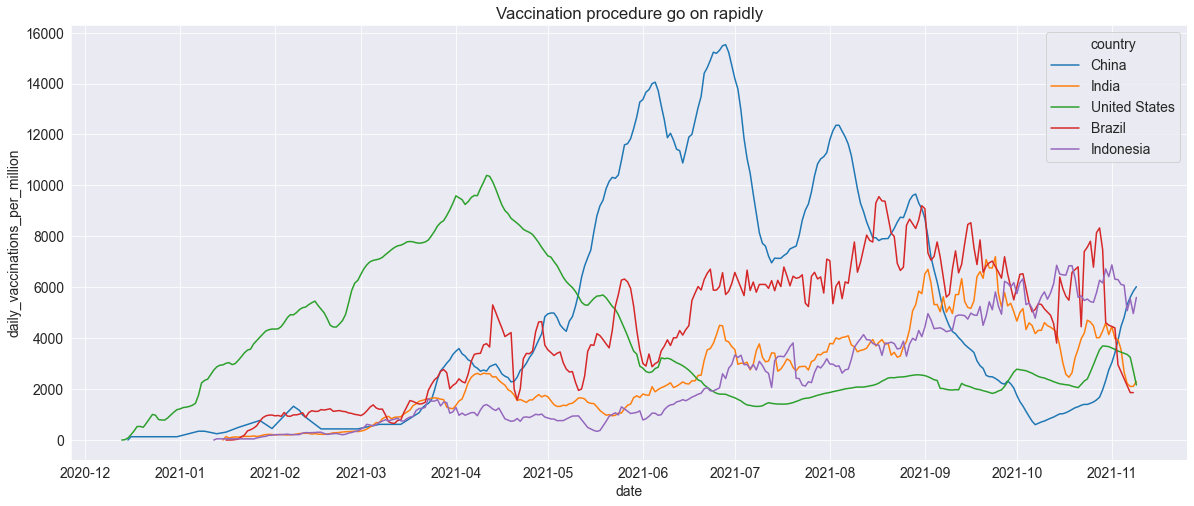

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], top_countries['daily_vaccinations_per_million'], hue= top_countries['country'], ci= False)
plt.title('Vaccination procedure go on rapidly');

## Asking and Answering Questions



#### Q1: Which country has most number of fully vaccinated people?

In [26]:
fully_vaccinated = vaccinations_df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)

In [27]:
fully_vaccinated.reset_index()

,country,people_fully_vaccinated
0,China,1.072454e+09
1,India,3.481638e+08
2,United States,1.927250e+08
3,Brazil,1.231666e+08
4,Japan,9.413425e+07
5,Indonesia,8.007052e+07
6,Mexico,6.226448e+07
7,Germany,5.585283e+07
8,Russia,4.993653e+07
9,Turkey,4.934197e+07


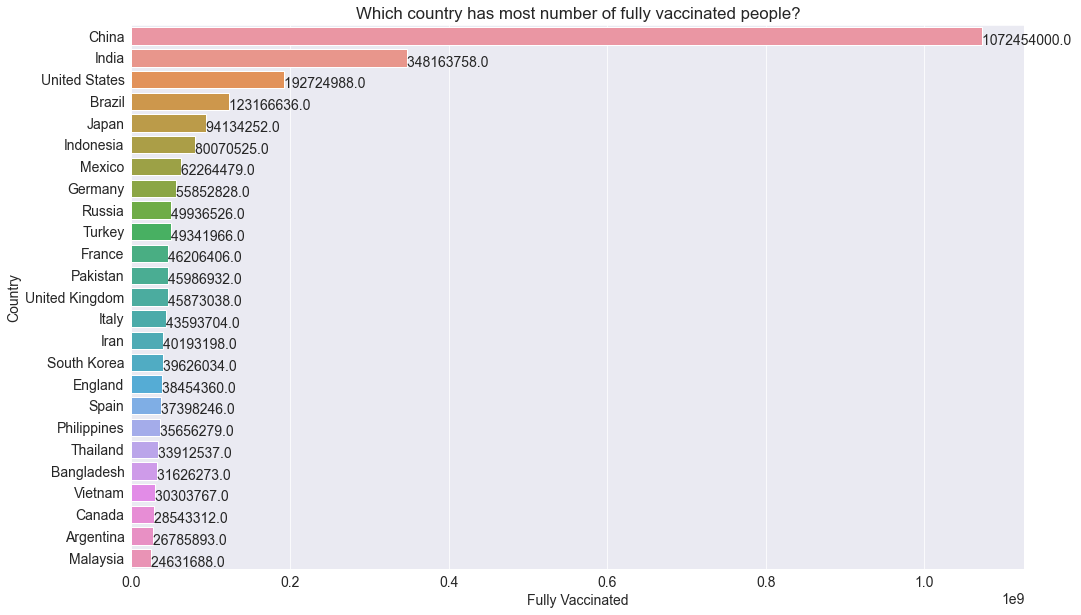

In [28]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?');

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

#### Q2: Daily COVID-19 vaccine doses administered per million people.

In [29]:
daily_vaccinations_per_million = vaccinations_df.groupby("country")["daily_vaccinations_per_million"].max().sort_values(ascending= False).head(15)

In [30]:
daily_vaccinations_per_million.reset_index()

,country,daily_vaccinations_per_million
0,Bhutan,117497.0
1,Niue,53903.0
2,Falkland Islands,53571.0
3,Nauru,51504.0
4,Cook Islands,46210.0
5,Mongolia,37684.0
6,Gibraltar,31700.0
7,Wallis and Futuna,30918.0
8,Cuba,28441.0
9,Saint Helena,27071.0


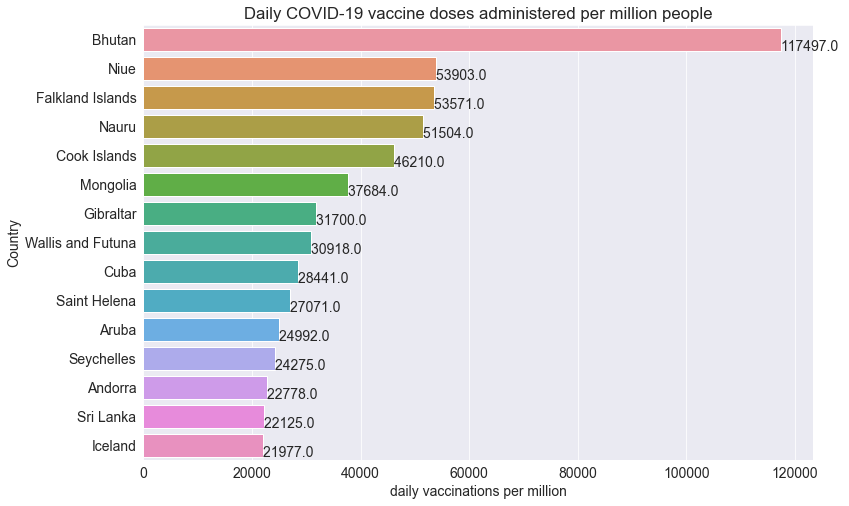

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=daily_vaccinations_per_million, y=daily_vaccinations_per_million.index )
plt.xlabel("daily vaccinations per million")
plt.ylabel("Country")
plt.title("Daily COVID-19 vaccine doses administered per million people");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

#### Q3: How many people daily vaccinated in Bangladesh?

In [32]:
bangladesh_df = vaccinations_df[vaccinations_df['country'] == 'Bangladesh']
bangladesh_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
4064,Bangladesh,BGD,2021-01-26,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,1,26
4065,Bangladesh,BGD,2021-01-27,26.0,26.0,0.0,26.0,26.0,0.00,0.00,0.00,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,1,27
4066,Bangladesh,BGD,2021-01-28,567.0,567.0,0.0,541.0,284.0,0.00,0.00,0.00,2.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,1,28
4067,Bangladesh,BGD,2021-01-29,0.0,0.0,0.0,0.0,1209.0,0.00,0.00,0.00,7.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,1,29
4068,Bangladesh,BGD,2021-01-30,0.0,0.0,0.0,0.0,1671.0,0.00,0.00,0.00,10.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,Bangladesh,BGD,2021-11-05,0.0,0.0,0.0,0.0,899101.0,0.00,0.00,0.00,5406.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,11,5
4348,Bangladesh,BGD,2021-11-06,73875852.0,43356721.0,30519131.0,0.0,710310.0,44.42,26.07,18.35,4271.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,11,6
4349,Bangladesh,BGD,2021-11-07,75557364.0,44688518.0,30868846.0,1681512.0,721041.0,45.43,26.87,18.56,4336.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,11,7
4350,Bangladesh,BGD,2021-11-08,76877974.0,45591578.0,31286396.0,1320610.0,783689.0,46.23,27.41,18.81,4712.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,2021,11,8


In [33]:
bangladesh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 4064 to 4351
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              288 non-null    object        
 1   iso_code                             288 non-null    object        
 2   date                                 288 non-null    datetime64[ns]
 3   total_vaccinations                   288 non-null    float64       
 4   people_vaccinated                    288 non-null    float64       
 5   people_fully_vaccinated              288 non-null    float64       
 6   daily_vaccinations_raw               288 non-null    float64       
 7   daily_vaccinations                   288 non-null    float64       
 8   total_vaccinations_per_hundred       288 non-null    float64       
 9   people_vaccinated_per_hundred        288 non-null    float64       
 10  people_ful

In [34]:
bangladesh_df.daily_vaccinations_raw.sum()

51068090.0

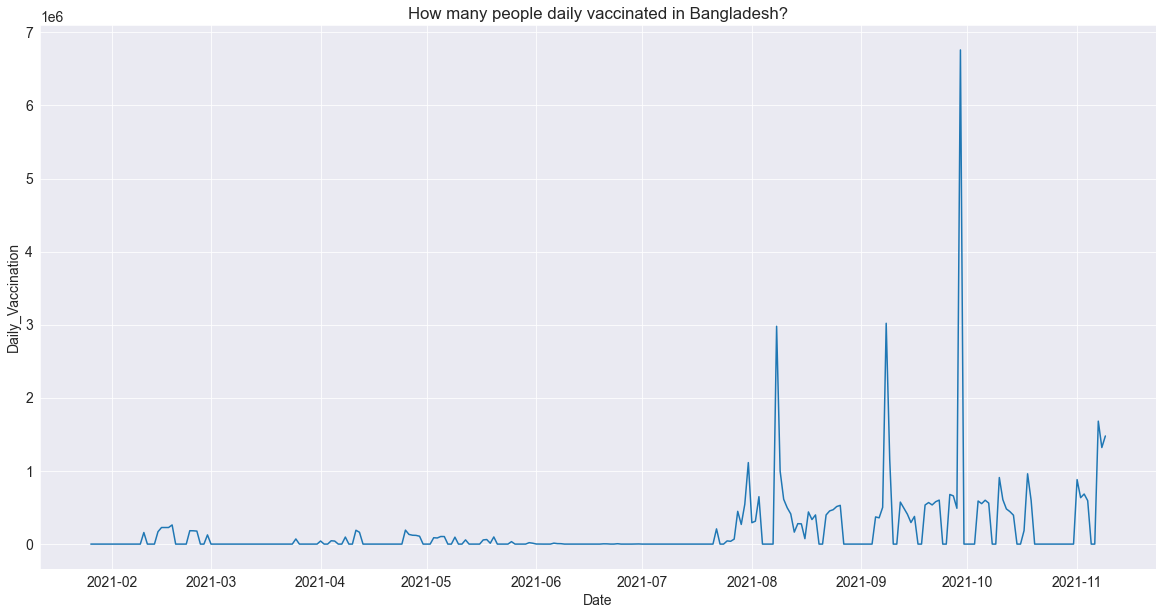

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(x=bangladesh_df.date, y=bangladesh_df.daily_vaccinations_raw)
plt.xlabel("Date")
plt.ylabel("Daily_Vaccination")
plt.title('How many people daily vaccinated in Bangladesh?');

#### Q4: How many people take at least one dose of vaccine in Bangladesh?

In [36]:
total_vaccinated_bd = bangladesh_df.total_vaccinations.max()/1000000

In [37]:
print("{0:.2f} M people take at least one dose of vaccine in Bangladesh.".format(total_vaccinated_bd))

78.36 M people take at least one dose of vaccine in Bangladesh.


#### Q5: How many people total fully vaccinated in Bangladesh?

In [38]:
fully_vaccinated_bd = bangladesh_df.people_fully_vaccinated.max()/1000000

In [39]:
print("Total fully vaccinated people in Bangladesh: {0:.2f}M".format(fully_vaccinated_bd))

Total fully vaccinated people in Bangladesh: 31.63M


#### Q6: What is the country that vaccinated completely most of the population?

In [2]:
population_country=vaccinations_df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(15)



NameError: name 'vaccinations_df' is not defined

In [41]:
population_country.reset_index()

,country,total_vaccinations_per_hundred
0,Gibraltar,272.87
1,Cuba,233.48
2,United Arab Emirates,213.96
3,Pitcairn,200.00
4,Chile,198.83
5,Uruguay,191.36
6,Singapore,185.10
7,Cayman Islands,175.20
8,Malta,172.88
9,Seychelles,172.41


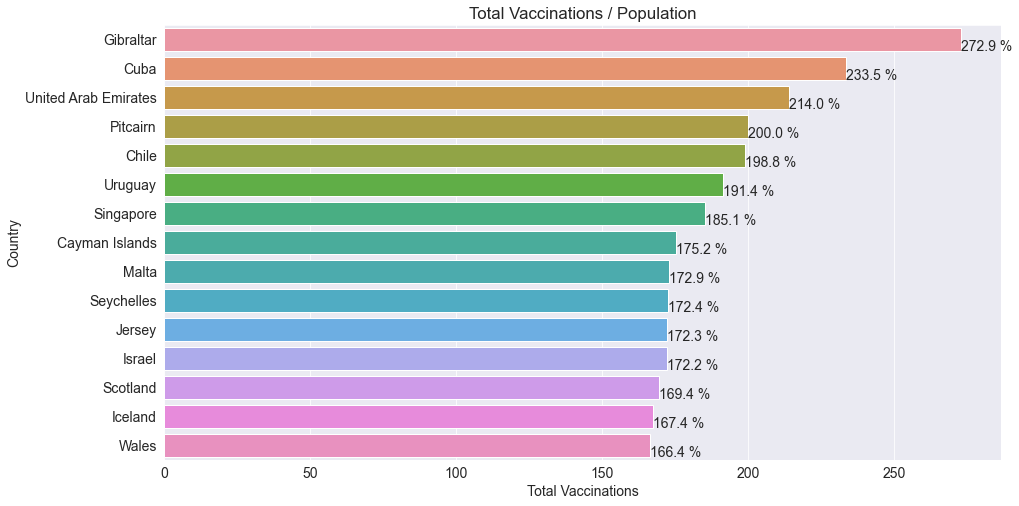

In [42]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=population_country, y=population_country.index)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

## Conclusion

Here is the analysis of the covid-19 vaccinations data. In future we work more analysis on this data.

* Datasets link - https://www.kaggle.com/gpreda/covid-world-vaccination-progress